# DigiFab Datathon

Aim: Centroid Distances

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn import *

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/DigiFab_Datathon/train_and_test_sets/'
save_path = '/content/drive/MyDrive/DigiFab_Datathon/'

train_descriptors = pd.read_csv(file_path+"train_descriptors.csv")
train_mord3d = pd.read_csv(file_path+"train_mord3d.csv")
train_morgan = pd.read_csv(file_path+"train_morgan.csv")
train_rdk = pd.read_csv(file_path+"train_rdk.csv")

train_crystals = pd.read_csv(file_path+"train_crystals.csv")
train_distances = pd.read_csv(file_path+"train_distances.csv")
train_centroid_distances = pd.read_csv(file_path+"train_centroid_distances.csv")

In [ ]:
test_descriptors = pd.read_csv(file_path+"test_descriptors.csv")
test_mord3d = pd.read_csv(file_path+"test_mord3d.csv")
test_morgan = pd.read_csv(file_path+"test_morgan.csv")
test_rdk = pd.read_csv(file_path+"test_rdk.csv")

## Date Engineering Step

* Look for NaN values.
* Look at magintude of values - do they need scaling?

In [ ]:
print(train_descriptors.describe())
print(train_mord3d.describe())

         Unnamed: 0           ABC  ...      mZagreb1      mZagreb2
count  13449.000000  13449.000000  ...  13448.000000  13449.000000
mean   40464.558183      8.791685  ...      4.820664      2.709742
std    19446.921704      2.294386  ...      1.421185      0.606246
min        2.000000      0.000000  ...      0.750000      0.000000
25%    33281.000000      7.387307  ...      3.833333      2.333333
50%    43815.000000      9.289847  ...      4.722222      2.833333
75%    55711.000000     10.663621  ...      5.694444      3.194444
max    66123.000000     13.654635  ...     10.652778      4.000000

[8 rows x 1614 columns]
         Unnamed: 0         PNSA1  ...        MOMI-Z           PBF
count  13449.000000  13432.000000  ...  13449.000000  13449.000000
mean   40464.558183    164.398549  ...    356.137203      0.383000
std    19446.921704     55.235914  ...    284.378542      0.304775
min        2.000000      0.000000  ...      0.000000      0.000000
25%    33281.000000    127.855661  ..

In [ ]:
# Data Preprocessing

In [ ]:
train_descriptors_full = train_descriptors.iloc[:, 3:-2].dropna(axis= 1, how="any")
train_descriptors_full.shape

(13449, 984)

In [ ]:
test_descriptors_full = test_descriptors[train_descriptors_full.columns]
test_descriptors_full.shape

(3363, 984)

In [ ]:
train_PCA = PCA(n_components=.95)
scaler_for_PCA = StandardScaler()
train_descriptors_PCA = train_PCA.fit_transform(scaler_for_PCA.fit_transform(train_descriptors_full))
test_descriptors_PCA = train_PCA.transform(scaler_for_PCA.transform(test_descriptors_full))
print(train_descriptors_PCA.shape, test_descriptors_PCA.shape)

(13449, 124) (3363, 124)


## Initial Models

In [ ]:
#Random Forest?

In [ ]:
target = "calculated_density"

In [ ]:
from sklearn.ensemble import RandomForestRegressor

target = "calculated_density"
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(train_descriptors_PCA, train_crystals[target])
y_pred = regressor.predict(train_descriptors_PCA)

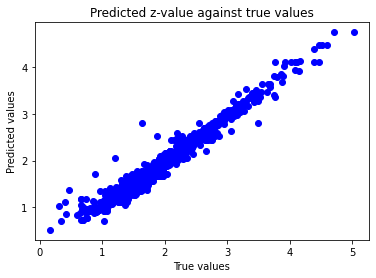

In [ ]:
predictions = regressor.predict(train_descriptors_PCA)
plt.plot(train_crystals[target], predictions, "bo")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Predicted z-value against true values")
plt.show()

In [ ]:
# Cross-validation

In [ ]:
cv_scores = model_selection.cross_val_score(
    regressor, 
    train_descriptors_PCA, 
    train_crystals[target], 
    scoring="neg_mean_absolute_error")

print("Average negative MAE:", round(np.mean(cv_scores), 3))
print("Standard deviation:", round(np.std(cv_scores), 3))

Average negative MAE: -0.057
Standard deviation: 0.002


### Outputting predictions for automated checking 
Link: https://github.com/stevenkbennett/fons_datathon_testing

In [ ]:
predictions = regressor.predict(test_descriptors_PCA)

In [ ]:
# np.savetxt("centroids_predictions.csv", predictions)
# Alternatively, if using pandas, you can use the following:
pd.DataFrame(predictions).to_csv(save_path+"task_1_predictions.csv", header=False, index=False)